In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [183]:
LIST_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/fertility/countries_in_stage_III.csv")
TFR_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/fertility/TFR_per_country_stage_III.csv")

MC_SIMULATIONS_PREFIX = "./MC_fertility_"

REGION_OF_INTEREST = "China"
TFR_OF_INTEREST = TFR_OF_STAGE_III_COUNTRIES[TFR_OF_STAGE_III_COUNTRIES["Region"] == REGION_OF_INTEREST]

MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
with open(MC_SIMULATIONS_FILE, "rb") as handle:
    MC_SIMULATIONS = pickle.load(handle)

N_samples = len(MC_SIMULATIONS)
simulation_len = len(MC_SIMULATIONS[0].path) - 1
simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
simulation_end = simulation_start + simulation_len + 1
simulation_window = np.arange(simulation_start, simulation_end, 1)

MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path[:, 0] for i in range(N_samples)]

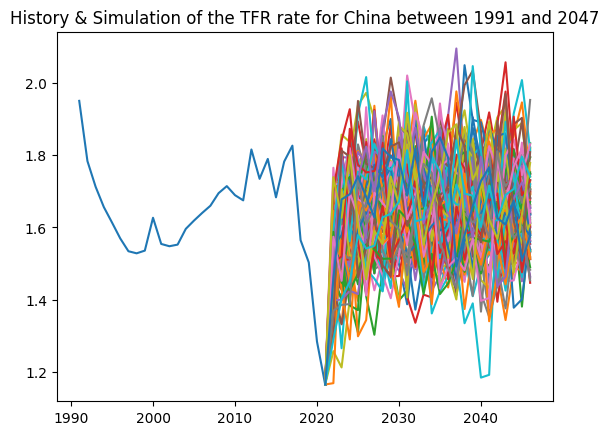

In [197]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
for path in MC_SIMULATIONS_path:
    plt.plot(simulation_window, path[:])
plt.title(
    f"History & Simulation of the TFR rate for {REGION_OF_INTEREST} between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.show()

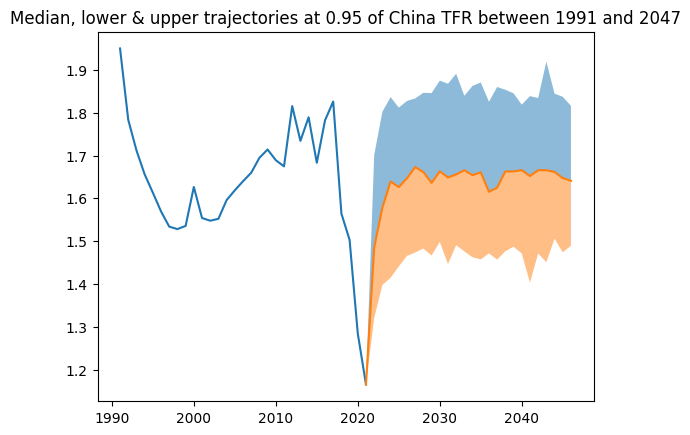

In [198]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.05, axis=0)
plt.plot(simulation_window, median_trajectory)
plt.title(
    f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
plt.show()

In [186]:
for i in range(N_samples):
    print(i, MC_SIMULATIONS_path[i][-1])

0 1.5369502453063546
1 1.6265522308170075
2 1.6775831468938553
3 1.680784816867435
4 1.7477389463015642
5 1.662119142841477
6 1.4824519446642754
7 1.819057255601034
8 1.5543708088516555
9 1.6373768163603892
10 1.7281287643701952
11 1.8326149060366106
12 1.5543786859457736
13 1.6471972102511467
14 1.65742979031823
15 1.7485009389767534
16 1.6830724754816184
17 1.7116672006949807
18 1.6541698820987871
19 1.5880520128389477
20 1.6920709308267188
21 1.5702812325099027
22 1.6935896376112152
23 1.540351088548814
24 1.5643533432580934
25 1.70239720592835
26 1.5336498355788186
27 1.8160441154677138
28 1.8131910464636818
29 1.5598193789891452
30 1.7411955821044331
31 1.663301686538137
32 1.5832169952835193
33 1.637377909104769
34 1.5985179009741906
35 1.6540393163814842
36 1.7178159403109872
37 1.690628267592535
38 1.7308427490008167
39 1.635414906882701
40 1.6135719887043443
41 1.7054756109100198
42 1.6968928231944702
43 1.4645523517001875
44 1.6392966733316705
45 1.7492869289156796
46 1.79529

(array([ 3.,  6.,  2.,  1., 20.,  3.,  7.,  5.,  4.,  8., 15.,  2.,  3.,
         7.,  3.,  3.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  3.]),
 array([0.08413827, 0.08705848, 0.08997869, 0.09289889, 0.0958191 ,
        0.0987393 , 0.10165951, 0.10457971, 0.10749992, 0.11042013,
        0.11334033, 0.11626054, 0.11918074, 0.12210095, 0.12502115,
        0.12794136, 0.13086156, 0.13378177, 0.13670198, 0.13962218,
        0.14254239, 0.14546259, 0.1483828 , 0.151303  , 0.15422321,
        0.15714342]),
 <BarContainer object of 25 artists>)

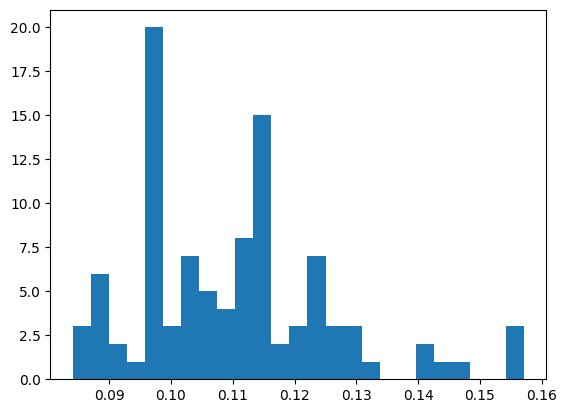

In [187]:
plt.hist([MC_SIMULATIONS[i].sigma_b for i in range(N_samples)], bins=25)

(array([ 8.,  6.,  0.,  2.,  2.,  1.,  3.,  4.,  6.,  7.,  7., 31., 15.,
         2.,  3.,  1.,  0.,  0.,  1.,  1.]),
 array([1.60204756, 1.60796974, 1.61389192, 1.61981409, 1.62573627,
        1.63165844, 1.63758062, 1.6435028 , 1.64942497, 1.65534715,
        1.66126932, 1.6671915 , 1.67311368, 1.67903585, 1.68495803,
        1.6908802 , 1.69680238, 1.70272456, 1.70864673, 1.71456891,
        1.72049109]),
 <BarContainer object of 20 artists>)

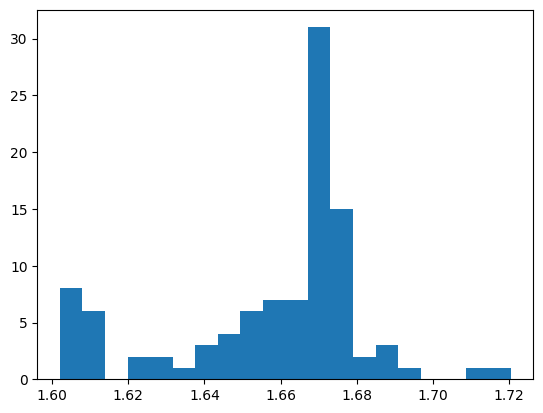

In [195]:
plt.hist([MC_SIMULATIONS[i].mu for i in range(N_samples)], bins=20)